In [1]:
import numpy as np
import pandas as pd
import math
import random

In [70]:
dimension = 4
S = 100
Sr = S/2
N_s = 4
N_re = 5
N_ed = 2
P_ed = 0.25
c_max = 1.5
c_min = 0.01
cc = 2
c1 = 1
c2 = 3
runtimes = 5
MaxIter = 10
F_re = 2

In [69]:
best_position = []
best_value = float('inf')

In [30]:
dataset = pd.read_csv('iris.csv')

In [179]:
# dataset.iloc[0]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [4]:
class Bacterium:
  def __init__(self):
    self.position = None 
    self.cost = None
    self.fitness = None
    self.health = None
    self.step_size = None
    self.direction = None
    self.pbest = None

In [76]:
population = [Bacterium() for _ in range(S)]

In [67]:
def objective_function(bacterium):
    global best_value, best_position
    con = sep = 0
    # find compactness
    for i in range(S):
        con += np.sqrt(np.sum(bacterium.position[:-1] - population[i].position[:-1]) ** 2) / dimension

    # find separateness
    for centroid in bacterium.position[:-1]:
        sep = 1 / np.sum([centroid - other for other in bacterium.position[:-1]])
    
    bacterium.cost = abs(con + sep)
    if bacterium.cost < best_value:
        best_value = bacterium.cost
        best_position = bacterium.position.copy()
        # bacterium.pbest = bacterium.position

In [7]:
def initialize_population():
    for bacterium in population:
        index = random.randint(0,S)
        bacterium.position = np.append(dataset.iloc[index][:-1].copy(), random.random())

        # objective_function(bacterium)
        bacterium.health = 0
        bacterium.fitness = 0
        bacterium.pbest = bacterium.position

In [89]:
# initialize_population()

In [78]:
# population[0].position

array([5.0, 3.5, 1.6, 0.6, 0.6869160921204245], dtype=object)

In [90]:
# for i in range(S):
#     objective_function(population[i])

In [8]:
def find_Euclidean_origin(bacterium):
    sum_of_squares = 0
    for i in range(len(bacterium.position[:-1])):
        sum_of_squares += (bacterium.position[i] - 0) ** 2
    distance = math.sqrt(sum_of_squares)
    return distance

In [10]:
def find_Euclidean(bacterium, point = [0,0,0,0]):
    sum_of_squares = 0
    for i in range(len(bacterium.position[:-1])):
        sum_of_squares += (bacterium.position[i] - point[i]) ** 2
    distance = math.sqrt(sum_of_squares)
    return distance

In [107]:
# archive = []

# distances = [find_Euclidean_origin(population[i]) for i in range(S)]
# sorted_indices = sorted(range(len(distances)), key=distances.__getitem__)
# for index in sorted_indices:
#     archive.append(population[index])

In [108]:
# archive[0].position

array([4.3, 3.0, 1.1, 0.1, 0.8938346970420608], dtype=object)

In [11]:
def es_estimation(archive, nobj):

  minH = np.inf
  flag = 0
  count_state = 0

  # Calculate distances from ideal point
  # distances = get_distances_from_ideal(archive) 
  for bacteria in archive:
    distances = [find_Euclidean_origin(bacteria)] 

  minA = min(distances)

  if flag == 0:

    if minH <= minA: # Situation 1
      count_state += 1
      
      if count_state >= nobj**2:
        flag = 1  

    else: # Situation 2
      minH = minA  
      count_state = 0

  else:
    
    if minH >= minA: # Situation 3
      count_state = 0
      flag = 0
      minH = minA

  return minH, flag, count_state

In [277]:
# minH, flag, count_state = es_estimation(archive, nobj=1)

In [278]:
# flag

0

In [32]:
min_val = [4.3, 2, 1, 0.1]
max_val = [7.9, 4.4, 6.9, 2.5]

In [103]:
# ideal_point = best_position

In [104]:
# best_position

array([5.2, 2.7, 3.9, 1.4, 0.42887984505962906], dtype=object)

In [12]:
def crowding_distance(archive):

  n_obj = len(archive[0].position[:-1]) # number of objectives
  n_sol = len(archive) # number of solutions
  
  # Initialize distances
  crowding_dist = np.zeros(n_sol)  
  
  # Calculate for each objective
  for i in range(n_obj):
  
    # Sort by objective i
    # archive_sorted = sorted(archive, key=lambda x: x[i])  

    # Set boundary distances to infinity
    crowding_dist[0] = np.inf
    crowding_dist[-1] = np.inf

    # Calculate other distances    
    for k in range(1,n_sol-1):

      d_right = archive[k+1].position[i] - archive[k].position[i] 
      d_left = archive[k].position[i] - archive[k-1].position[i]
      
      crowding_dist[k] += (d_right + d_left) / (max_val[i] - min_val[i])

  # Normalize over objectives    
  crowding_dist = crowding_dist / n_obj

  return crowding_dist

In [250]:
# archive[0]

In [251]:
# ideal_point

array([5.5, 2.3, 4.0, 1.3, 0.4789604886025518], dtype=object)

In [13]:
def select_gbests(archive, ideal_point):

  archive_size = len(archive)
  
  # Normalize objectives and calculate distances
  # normalize_archive(archive)  
  for bacterium in archive:
    distances = [find_Euclidean(bacterium, ideal_point)]

  # Select c_gbest
  c_gbest = archive[np.argmin(distances)]

  # Get crowding distances 
  crowding_dists = crowding_distance(archive)

  # Sort by crowding distance  
  sorted_inds = np.argsort(crowding_dists)[::-1]  

  if archive_size >= 4:

    # Select first 4 non-dominated solutions
    # d_gbest_options = get_nondominated(archive, 4) 
    d_gbest_options = archive[:4]

    r = random.random()
    if r <= 0.25:
      d_gbest = d_gbest_options[0]
    elif r <= 0.5:  
      d_gbest = d_gbest_options[1]
    elif r <= 0.75:
      d_gbest = d_gbest_options[2]  
    else:  
      d_gbest = d_gbest_options[3]

  else:
    d_gbest = d_gbest_options[0]

  return c_gbest, d_gbest

In [109]:
# c_gbest, d_gbest = select_gbests(archive, ideal_point)

In [110]:
# c_gbest.position

array([4.3, 3.0, 1.1, 0.1, 0.8938346970420608], dtype=object)

In [14]:
def select_pbest_leader(population):

  num_bacteria = len(population)
  pbest = [bact.position for bact in population] # get all pbest

  # Separately sort the 2 objectives of all pbest
  obj1_vals = [p[0] for p in pbest] 
  obj2_vals = [p[1] for p in pbest]

  sorted_obj1 = sorted(obj1_vals)
  sorted_inds1 = sorted(range(len(obj1_vals)), key=obj1_vals.__getitem__)

  sorted_obj2 = sorted(obj2_vals) 
  sorted_inds2 = sorted(range(len(obj2_vals)), key=obj2_vals.__getitem__)

  if random.random() < 0.5:
    sorted_pbest = sorted_obj1
    sorted_inds = sorted_inds1
  else:  
    sorted_pbest = sorted_obj2
    sorted_inds = sorted_inds2

  # Map sorted pbest to each bacterium
  learned_pbest = []
  for i in range(num_bacteria):
    pos = sorted_inds.index(i)  
    learned_pbest.append(sorted_pbest[pos])

  # Randomly select one as pbest leader  
  pbest_leader_idx = random.randint(0,num_bacteria-1)
  # pbest_leader = learned_pbest[pbest_leader_idx]
  pbest_leader = population[pbest_leader_idx]

  return pbest_leader

In [80]:
# pbest_leader = select_pbest_leader(population)

In [81]:
# pbest_leader.position

array([4.3, 3.0, 1.1, 0.1, 0.16757838263070224], dtype=object)

In [112]:
# if flag == '0':
#     gbest = c_gbest
# else:
#     gbest = d_gbest

In [113]:
# gbest.position

array([4.4, 3.2, 1.3, 0.2, 0.8557687982753414], dtype=object)

In [15]:
def tumble(pbest_leader, gbest, bacterium, iter = 1):
    step_direction = c1 * random.random() * (pbest_leader.position[:-1] - bacterium.position[:-1]) + c2 * random.random() * (gbest.position[:-1] - bacterium.position[:-1]) * random.choice((-1, 1))
    
    C = c_min + math.exp(-cc * ((iter / N_s) ** 2)) * (c_max - c_min)

    bacterium.position[:-1] = bacterium.position[:-1] + C * step_direction

    # bacterium.step_direction = step_direction
    bacterium.step_size = C
    objective_function(bacterium)

In [114]:
# pbest_leader.position[:-1]

array([6.1, 2.9, 4.7, 1.4], dtype=object)

In [91]:
# population[0].position[:-1]

array([5.6, 2.7, 4.2, 1.3], dtype=object)

In [98]:
# gbest.position[:-1]

array([nan, nan, nan, nan], dtype=object)

In [97]:
# pbest_leader.position[:-1] - population[0].position[:-1]

array([0.5, 0.19999999999999973, 0.5, 0.09999999999999987], dtype=object)

In [94]:
# c1 * random.random()

0.8712807831388374

In [95]:
# c2 * random.random()

2.6259577992783765

In [115]:
# c1 * random.random() * (pbest_leader.position[:-1] - population[0].position[:-1]) + c2 * random.random() * (gbest.position[:-1] - population[0].position[:-1])

array([-1.2080893334361293, 0.5316753136017156, -2.9686493128845846,
       -1.1322540915846795], dtype=object)

In [ ]:
# tumble(pbest_leader, population[0], iter = 1)

In [83]:
# population[0].position

array([nan, nan, nan, nan, 0.6869160921204245], dtype=object)

In [17]:
def swim(bacterium, pbest_leader, gbest):
    global best_value
    step_direction = c1 * random.random() * (pbest_leader.position[:-1]- bacterium.position[:-1]) + c2 * random.random() * (gbest.position[:-1] - bacterium.position[:-1])
    bacterium.position[:-1] = bacterium.position[:-1] + bacterium.step_size * step_direction
    for i in range(N_s):
        if bacterium.cost <= best_value:
            bacterium.position[:-1] = bacterium.position[:-1] + bacterium.step_size * step_direction
            objective_function(bacterium)
        else:
            break

In [72]:
def chemotaxis(gbest, iter):
    global best_value, best_position, population

    for bacterium in population:
        pbest_leader = select_pbest_leader(population)
        tumble(pbest_leader,gbest, bacterium, iter)
        if bacterium.cost <= best_value:
            bacterium.pbest = bacterium.position
        last_cost = bacterium.cost
        swim(bacterium, pbest_leader, gbest)        
        if bacterium.cost <= last_cost:
            for i in range(N_s):
                swim(bacterium, pbest_leader, gbest)
                bacterium.pbest = bacterium.position
    
        objective_function(bacterium)

        if bacterium.cost <= best_value:
            best_value = bacterium.cost
            best_position = bacterium.position
        # if bacterium.cost > best_value:
        #     bacterium.cost = best_value
        #     bacterium.position = best_position

In [19]:
def get_nondominated(population):
  
  nondominated = []
  
  # Compare each bacterium to others
  for i in range(len(population)):
    
    bacterium_i = population[i]
    is_nondominated = True
    
    # Compare bacterium i to all others    
    for j in range(len(population)):
      
      if i == j:
        continue
      
      bacterium_j = population[j]
      
      # If bacterium j has equal or better objective
      if bacterium_j.cost <= bacterium_i.cost:
        is_nondominated = False
        break
        
    # Bacterium i is nondominated against all others      
    if is_nondominated:
      nondominated.append(bacterium_i)
      
  return nondominated

In [20]:
def get_dominated(population):

  dominated = []

  nondominated = get_nondominated(population)

  # Compare each bacterium to get nondominated
  for bacterium in population:

    is_dominated = True

    # Check if bacterium is in nondominated list
    if bacterium in nondominated:
      continue

    # Compare bacterium to all nondominated
    for nd_bacterium in nondominated:  

      if bacterium.cost > nd_bacterium.cost:
        is_dominated = True
        break

    # Bacterium is dominated by at least one nondom
    if is_dominated:
      dominated.append(bacterium)

  return dominated

In [21]:
def reproduction_strategy(population, archive):
  
  # Get non-dominated solutions from archive and bacteria 
  nondom_archive = get_nondominated(archive) 
  nondom_bacteria = get_nondominated(population)
  
  Sum_nondom = len(nondom_archive) + len(nondom_bacteria)
  
  if Sum_nondom < len(population): # Situation 1
    
    BS1 = nondom_archive 
    BS2 = nondom_bacteria
    
    # Sort dominated bacteria and select some
    dominated = get_dominated(population)
    cost = [dominated[i].cost for i in range(len(dominated))] 
    sorted_indices = sorted(range(len(cost)), key=cost.__getitem__)
    new_dominated = [dominated[i] for i in sorted_indices]
    dominated = new_dominated.copy()
    
    BS3 = random.sample(dominated, len(population) - Sum_nondom)
    
    new_BS = BS1 + BS2 + BS3
    
  elif len(nondom_archive) < len(population): # Situation 2

    BS1 = nondom_archive
    BS2 = random.sample(nondom_bacteria, len(population) - len(nondom_archive))
    new_BS = BS1 + BS2
    
  else: # Situation 3

    BS1 = random.sample(nondom_archive, len(population))
    new_BS = BS1
    
  # Reproduce and return new swarm
  parents = new_BS[:len(new_BS)//2] 
  offspring = parents.copy()
  return new_BS + offspring

In [325]:
# new_population = reproduction_strategy(population, archive)

In [23]:
def elimination_dispersal_BS(population, Ped):

  dim = len(population[0].position[:-1]) # dimension of each bacterium

  for i in range(len(population)):

    bacterium = population[i]

    if random.random() < Ped: 
      
      # Disperse bacterium location
      bacterium.position[:-1] = [min_val[j] + random.random() * (max_val[j]-min_val[j]) for j in range(dim)]
      
      # Limit to bounds and recalculate objective  
      bacterium.position[:-1] = [min(max(x,min_val[j]),max_val[j]) for j,x in enumerate(bacterium.position[:-1])]
      bacterium.cost = objective_function(bacterium)

In [336]:
# new_population_1 = elimination_dispersal_BS(population, 0.2)

In [337]:
# len(new_population_1)

100

In [24]:
def elimination_dispersal_archive(archive):

  dim = len(archive[0].position[:-1])

  # Keep original archive
  archive_old = archive[:]  

  # Randomly select dimension
  temp_d = random.randint(0, dim-1)

  for i in range(len(archive)):

    sol = archive[i]

    # Disperse randomly on selected dimension
    sol.position[temp_d] = min_val[temp_d] + random.random() * (max_val[temp_d] - min_val[temp_d])  

    # Limit and recalculate objective
    sol.position[temp_d] = min(max(sol.position[temp_d],min_val[temp_d]),max_val[temp_d])
    sol.cost = objective_function(sol)

  # Get final archive from old and new
  archive = archive_old + archive

  return archive

In [346]:
# new_population_2 = elimination_dispersal_archive(archive)

In [347]:
# len(new_population_2)

200

In [25]:
df = pd.read_csv('iris.csv')
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [26]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [27]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

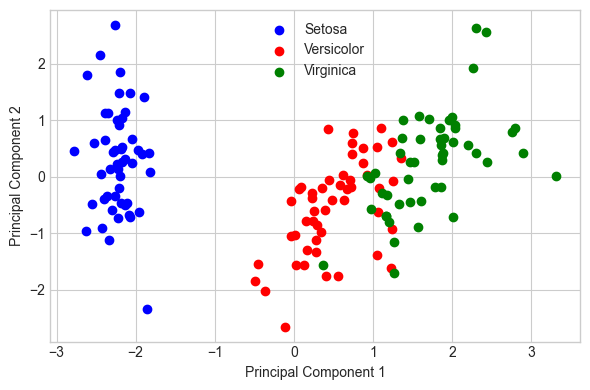

In [28]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Setosa', 'Versicolor', 'Virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()


In [73]:
# ES-NMPBFO

population = [Bacterium() for _ in range(S)]        # Initialize positions, compute objective value and obtain the pbest of all bacteria (line 2)
initialize_population()
for _ in range(runtimes):
    
    for i in range(S):
        objective_function(population[i])

    archive = []        # Initialize the external archive Rep (line 3)

    distances = [find_Euclidean_origin(population[i]) for i in range(S)]
    sorted_indices = sorted(range(len(distances)), key=distances.__getitem__)
    for index in sorted_indices[:20]:
        archive.append(population[index])

    minH = float('inf')
    flag = 0
    count_state = 0
    count_rep = 0
    total_AH = 0

    for iter in range(MaxIter):         # line 5
        c_gbest, d_gbest = select_gbests(archive, ideal_point = best_position)      # line 7
        minH, flag, count_state = es_estimation(archive, nobj = 1)                  # line 8
        if flag == 0:
            gbest = c_gbest
        else:
            gbest = d_gbest

        chemotaxis(gbest, iter = iter)

        minH, flag, count_state = es_estimation(archive, nobj=1)

        if iter % F_re == 0:
            new_population = reproduction_strategy(population, archive)
        
        sum = 0
        for bacterium in new_population:
            distance = find_Euclidean_origin(bacterium)
            sum += distance
        total_A = sum
        total_AH = total_A
        if total_AH == total_A:
            count_rep += 1
        
        if count_rep >= 1:
            elimination_dispersal_BS(new_population, P_ed)
            archive = elimination_dispersal_archive(archive)

        minH, flag, count_state = es_estimation(archive, nobj = 1)

        population = new_population[:150]
        print('Best value:', best_value)

Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best value: 47.518421052631595
Best val

In [64]:
new_data = [bacterium.position[:-1] for bacterium in population]

In [65]:
new_data_std = StandardScaler().fit_transform(new_data)
Y = sklearn_pca.fit_transform(new_data_std)

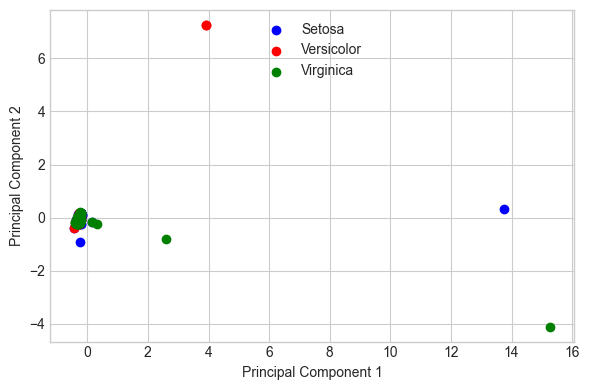

In [66]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Setosa', 'Versicolor', 'Virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()